In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv('/content/drive/MyDrive/ML project/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [6]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
df['Route']=df['AirportFrom']+'-'+df['AirportTo']
print(df)

            id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
0            1      CO     269         SFO       IAH          3    15     205   
1            2      US    1558         PHX       CLT          3    15     222   
2            3      AA    2400         LAX       DFW          3    20     165   
3            4      AA    2466         SFO       DFW          3    20     195   
4            5      AS     108         ANC       SEA          3    30     202   
...        ...     ...     ...         ...       ...        ...   ...     ...   
539378  539379      CO     178         OGG       SNA          5  1439     326   
539379  539380      FL     398         SEA       ATL          5  1439     305   
539380  539381      FL     609         SFO       MKE          5  1439     255   
539381  539382      UA      78         HNL       SFO          5  1439     313   
539382  539383      US    1442         LAX       PHL          5  1439     301   

        Delay    Route  
0 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
 9   Route        539383 non-null  object
dtypes: int64(6), object(4)
memory usage: 41.2+ MB


[Text(0.5, 1.0, 'Frequency of flights per day')]

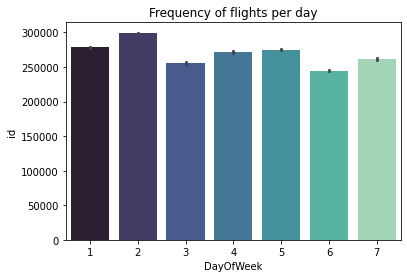

In [9]:
sns.barplot(x='DayOfWeek',y='id',data=df, palette='mako').set(title='Frequency of flights per day')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


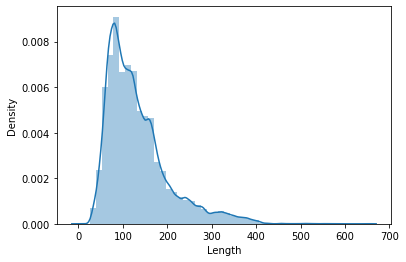

In [10]:
sns.distplot(df['Length'])

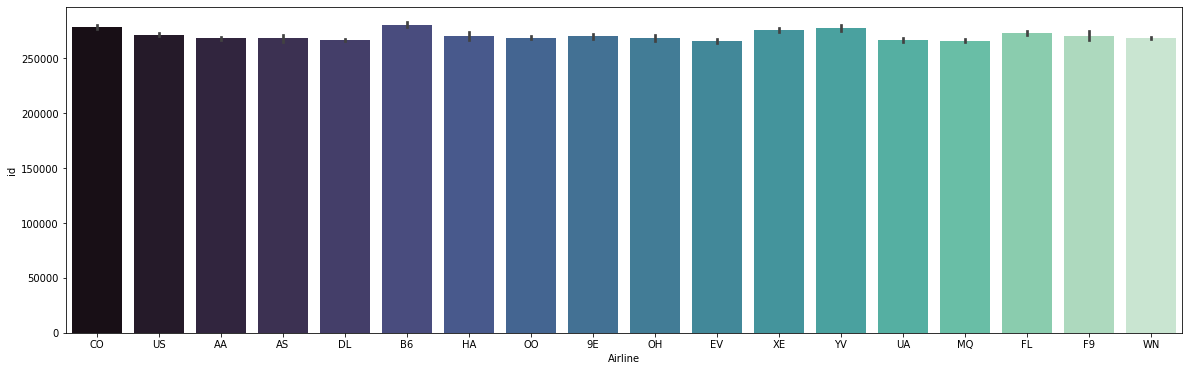

In [11]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline',y='id',data=df,palette='mako')

In [12]:
df1=pd.pivot_table(data=df,values='id',index='Airline',columns='Delay',aggfunc='count')
df1['Delay_flights']=df1[1]
df1['Flights_ontime']=df1[0]

df1['Total_flights']=df1['Delay_flights']+df1['Flights_ontime']

df1['Delay_index']=df1['Delay_flights']/df1['Total_flights']
df1.sort_values(by='Delay_index',ascending=False)
df2=df1.drop(columns=[1,0])

df2

Delay,Delay_flights,Flights_ontime,Total_flights,Delay_index
Airline,,,,
9E,8226,12460,20686,0.397660
AA,17736,27920,45656,0.388470
AS,3892,7579,11471,0.339290
B6,8459,9653,18112,0.467038
CO,11957,9161,21118,0.566199
DL,27452,33488,60940,0.450476
EV,11255,16728,27983,0.402208
F9,2899,3557,6456,0.449040
FL,6275,14552,20827,0.301292


In [13]:
df1=pd.pivot_table(data=df,values='id',columns='Delay',aggfunc='count')
df1['Total']= df1[0]+df1[1]
df1['Delay index'] = df1[1]/df1['Total']
df1

Delay,0,1,Total,Delay index
id,299119,240264,539383,0.445442


In [14]:
df
X=pd.DataFrame({'DayOfWeek': df['DayOfWeek'],
                'Time': df['Time'],
                'Length': df['Length']            
               })
y=df['Delay']

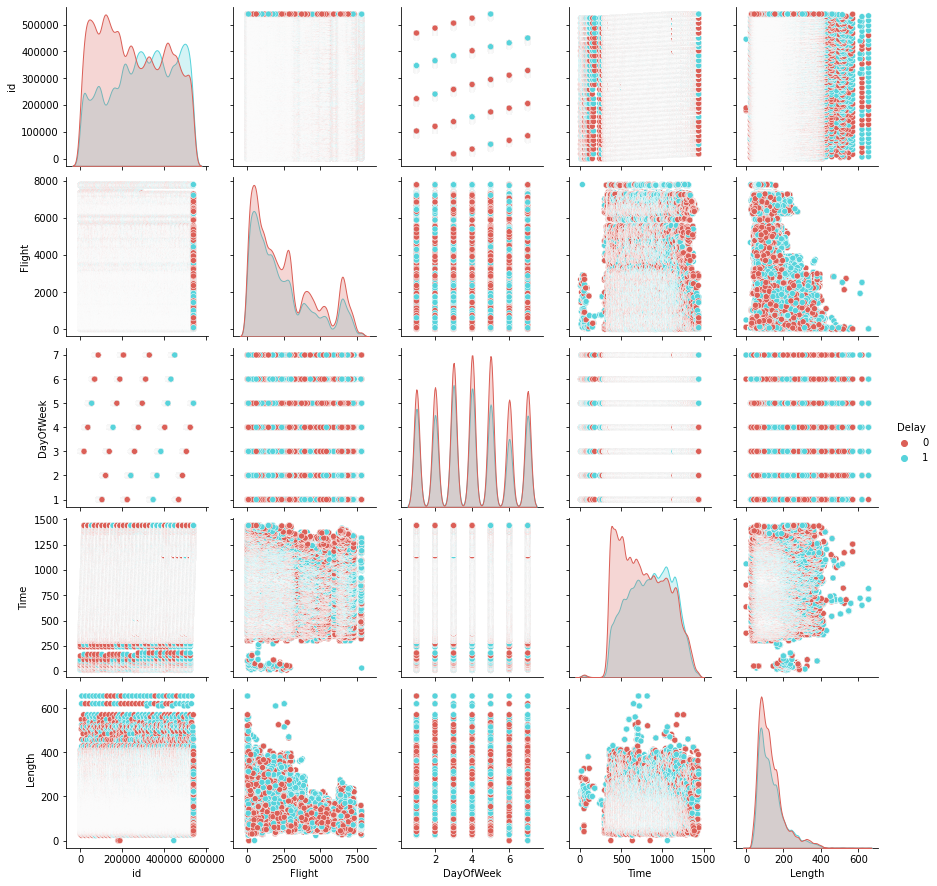

In [15]:
sns.pairplot(data=df, hue='Delay', palette='hls' )

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, stratify= y)
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
knn.score(X_test,y_test)

0.6110311157803665

In [18]:
n=[*range(6,26,1)]
score=[]
for i in n: 
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(knn.score(X_test,y_test))

[Text(0.5, 1.0, 'Performance KNN regression')]

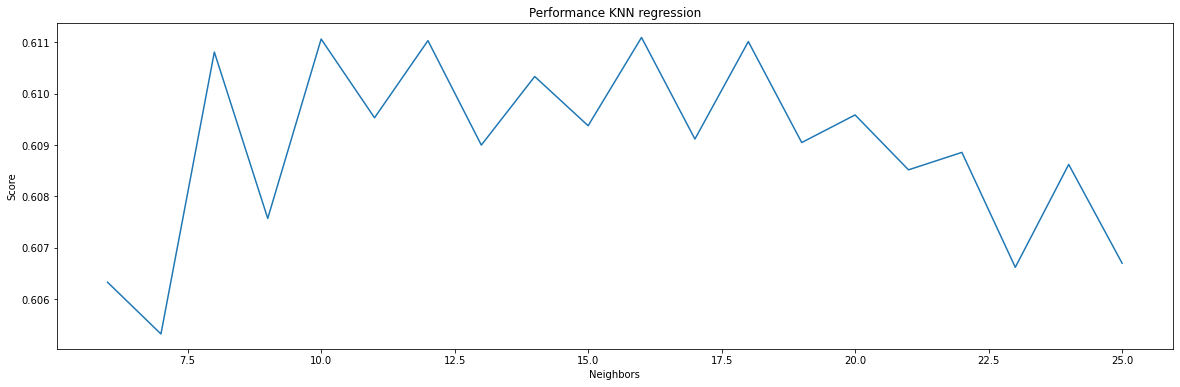

In [19]:
plt.figure(figsize=(20,6))
perf=pd.DataFrame({'Neighbors':n,
                   'Score': score
                   })

sns.lineplot(data=perf,x='Neighbors',y='Score', palette='husl').set(title='Performance KNN regression')